<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Exercícios</font></b></strong>

Neste Jupyter Notebook você encontra 2 exercícios. Com base no que você estudou nas aulas anteriores, tente resolvê-los e avaliar seu nível de compreensão sobre análise de séries temporais. Acompanhe abaixo suas atividades.

<b>Exercício 1:</b>

Seu trabalho neste exercício é analisar a série temporal de produção mensal de sorvete entre 1972 e 2020 e então responder à pergunta abaixo:

1- Essa série temporal é estacionária ou não estacionária? Apresente o resultado da sua análise para justificar sua resposta.

O dataset fornecido a você é uma versão simplificada do dataset Icecream, resultado de um estudo realizado nos EUA:

https://rdrr.io/rforge/Ecdat/man/Index.Time.Series.html

<b>Exercício 2:</b>

Neste exercício você usará um dataset disponível no pacote yfinance (que deve ser instalado conforme mostrado abaixo). Já podemos antecipar que a série NÃO é estacionária e seu trabalho é aplicar as transformações necessárias para converter a série em estacionária.

Aproveite a oportunidade para estudar e revisar tudo que foi mostrado até aqui no curso, antes de avançarmos para temas mais complexos nas próximas aulas.


_ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ -_ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - 

<br>
<b>Exercío 1</b>

In [68]:
# The new versions of Pandas and Matplotlib bring several warning messages to the desenvolper. Lets's disable this. 
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports for data manipulatioo
import numpy as np
import pandas as pd

# Imports for data vasualization
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import yfinance as yf

# Imports for data analysis
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports for formatting graphics 
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')


# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

#Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Data Scientist Rodolfo Terra" --iversions

Author: Data Scientist Rodolfo Terra

sys        : 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
seaborn    : 0.10.1
pandas     : 1.1.1
statsmodels: 0.11.1
matplotlib : 3.3.1
yfinance   : 0.1.55
numpy      : 1.18.2



You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# Function to test stationarity

def testa_estacionaridade(serie):
    
    # Calculates mobile statistcs
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()
    
    # Plot of mobile statistics
    orig = plt.plot(serie, color ='blue', label = "Original")
    mean = plt.plot(rolmean, color = 'red', label = 'Média Padrão')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Dickey-Fuller teste:
    # Print
    print(('\nResultado do Teste Dickey-Fuller:\n'))
    
    # Test
    dfteste = adfuller(serie,autolag = 'AIC')
    
    # Formatting the output
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])
    
    # Loop for each test output item 
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' %key] = value
        
    # Print
    print(dfsaida)
    
    # Tests the p-value
    print('\nConclusão:')
    if dfsaida[1] >0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

In [64]:
dados = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset2.csv')

In [65]:
dados.head()

,DATE,NUMBER
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [66]:
# Rename columns

#dados.columns = ['data','producao']
# or
dados.rename(columns = {'DATE':'data', 'NUMBER':'producao'}, inplace = True)

dados.head()

,data,producao
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


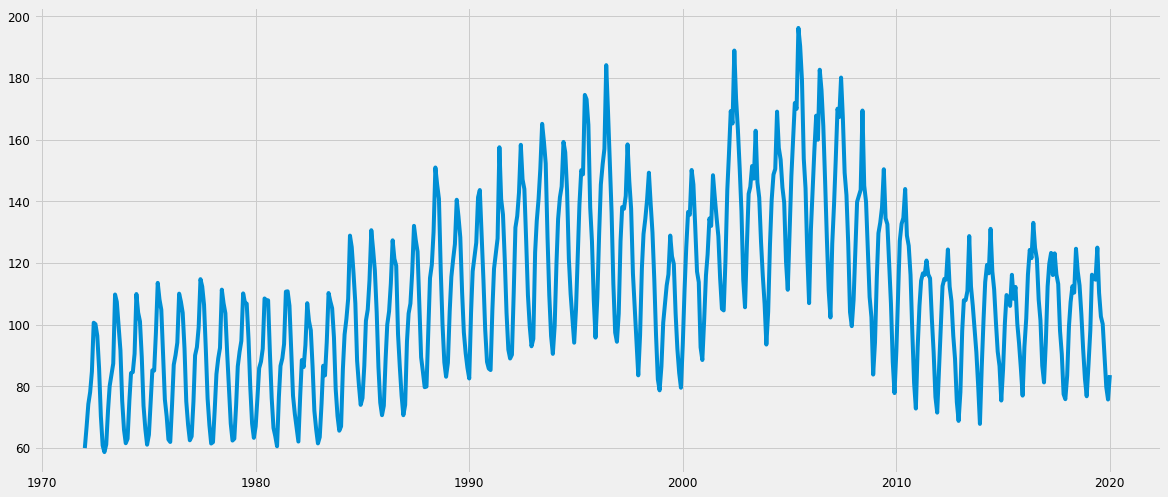

In [20]:
# Plot

plt.plot(dados)

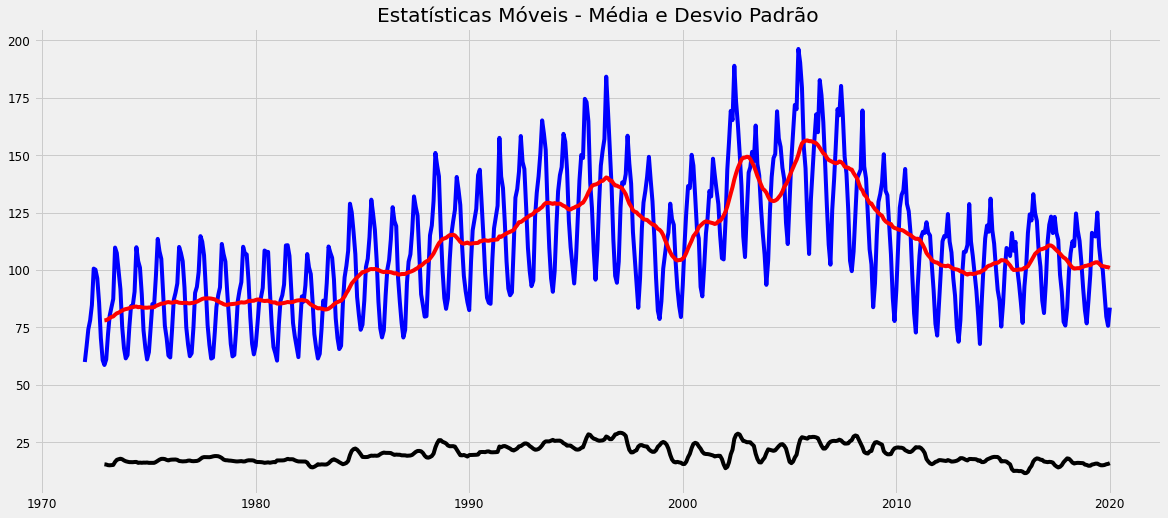


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.758009
Valor-p                           0.401499
Número de Lags Consideradas      19.000000
Número de Observações Usadas    557.000000
Valor Crítico (1%)               -3.442145
Valor Crítico (5%)               -2.866743
Valor Crítico (10%)              -2.569541
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [21]:
testa_estacionaridade(dados)

<b> Respota da Questão 1</b>

 A série não é estacionária, pois média e variância não são constantes ao longo do tempo, o que é confirmado pelo valor-p do teste de estacionaridade. A Autocorrelação da série nos ajuda a identificar isso também.

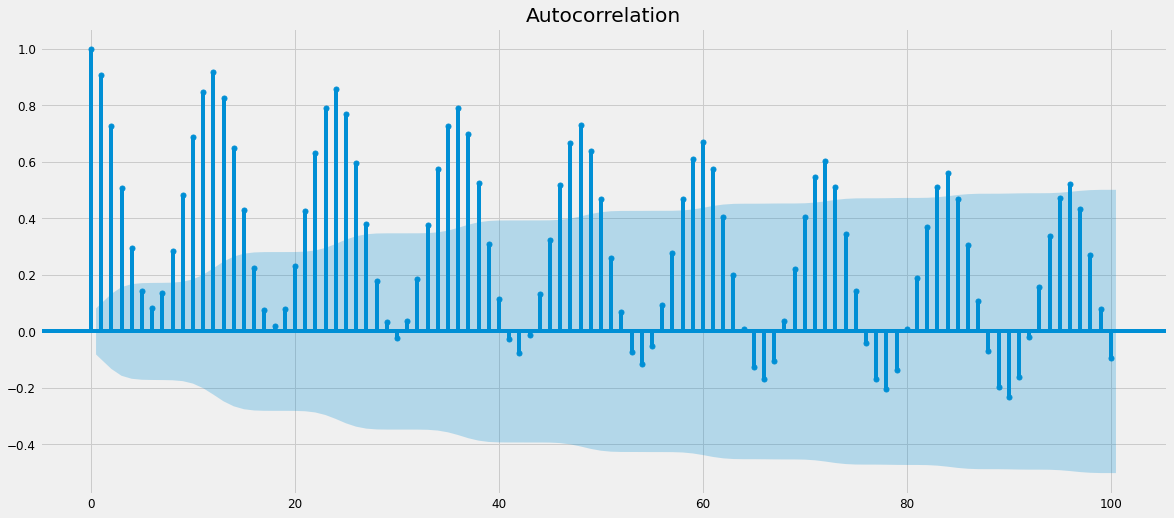

In [73]:
# Plot ACF (Auto Correlation)

# A autocorrelação é a correlação de uma série temporal com uma cópia atrasada de si mesma.

# Testando a hipótese nula de que a correlação da série com a sua defasagem é igual a zero, podemos rejeitá-la 
# sempre que o nível de correlação estiver acima ou abaixo da área azul, com um nível de significância de 5%. 

# Com base na deterioração do ACF, provavelmente estamos lidando com um processo de regressão automática. 
# Mas isso é assunto para outras aulas.

acf_plot = plot_acf(dados.producao, lags = 100)

_ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ -_ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ - _ -

<br>
<b>Exercío 2</b>

In [23]:
# Install the package yfinance

!pip install -q yfinance

You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [24]:
# Load the package

import yfinance as yf

In [26]:
# Difines the code of one of the available shares whose data is made avaliable by Yahoo Finance

tickerSymbol = 'SPY'

In [27]:
# Collect Data

tickerData = yf.Ticker(tickerSymbol)

In [30]:
# Get historical values between 2015 and 2020

tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [31]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,184.374289,184.820975,182.408858,183.525574,121465900,0.0,0
2015-01-05,182.399927,182.578599,179.880623,180.211166,169632600,0.0,0
2015-01-06,180.541694,181.104524,177.656104,178.513748,209151400,0.0,0
2015-01-07,179.943165,181.104552,179.460749,180.738266,125346700,0.0,0
2015-01-08,182.256991,184.177751,182.239133,183.945465,147217800,0.0,0


In [35]:
# Generates the dataframe with the closing values of the shares

tickerDf = tickerDf[['Close']]

In [36]:
tickerDf.head()

,Close
Date,
2015-01-02,183.525574
2015-01-05,180.211166
2015-01-06,178.513748
2015-01-07,180.738266
2015-01-08,183.945465


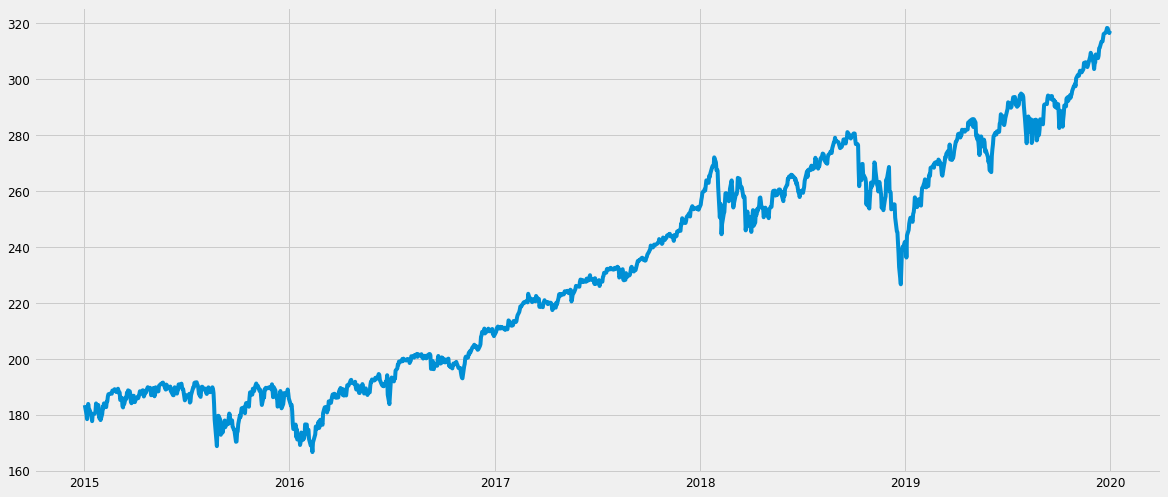

In [40]:
# plot

plt.plot(tickerDf)

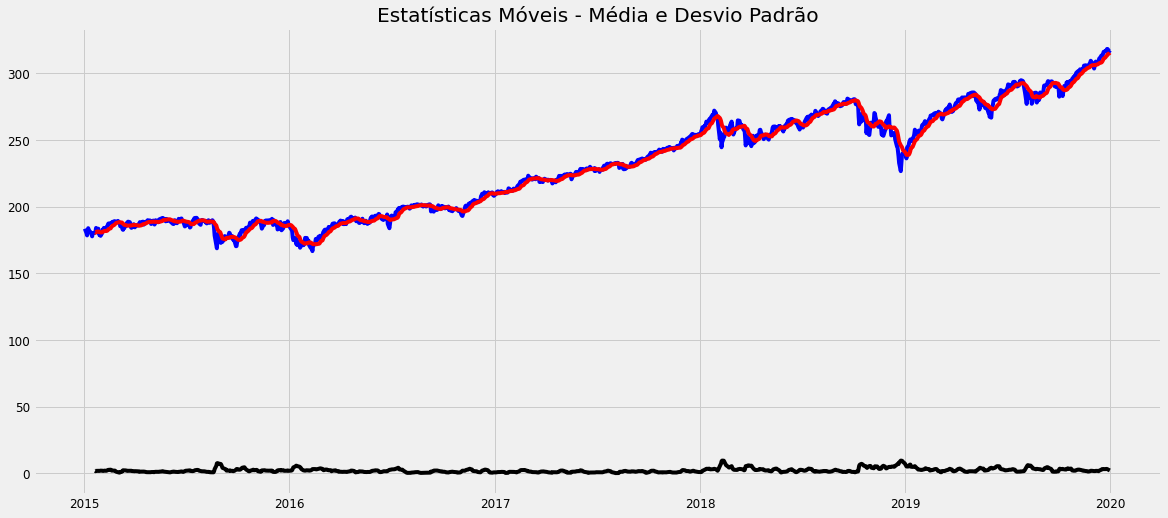


Resultado do Teste Dickey-Fuller:

Estatística do Teste               0.273922
Valor-p                            0.976116
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1249.000000
Valor Crítico (1%)                -3.435596
Valor Crítico (5%)                -2.863857
Valor Crítico (10%)               -2.568004
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [38]:
testa_estacionaridade(tickerDf)

In [74]:
# Calcutating Differentiation

diff_primeira_ordem = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
diff_primeira_ordem = np.concatenate([diff_primeira_ordem, [0]])

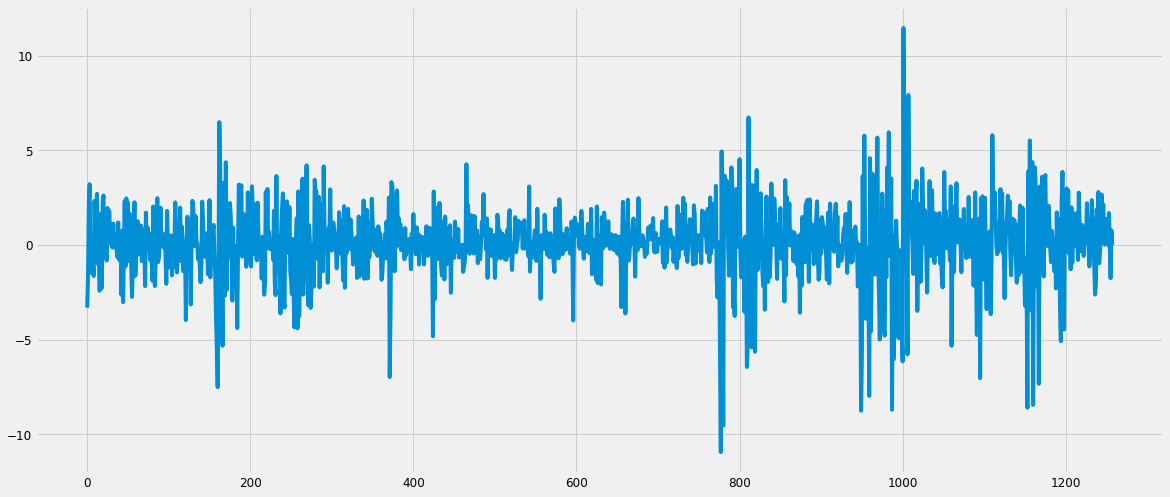

In [76]:
# Including the first order difference in the dataset

diff_primeira_ordem = pd.DataFrame(diff_primeira_ordem)
diff_primeira_ordem.columns = ['Diff']

plt.plot(diff_primeira_ordem)

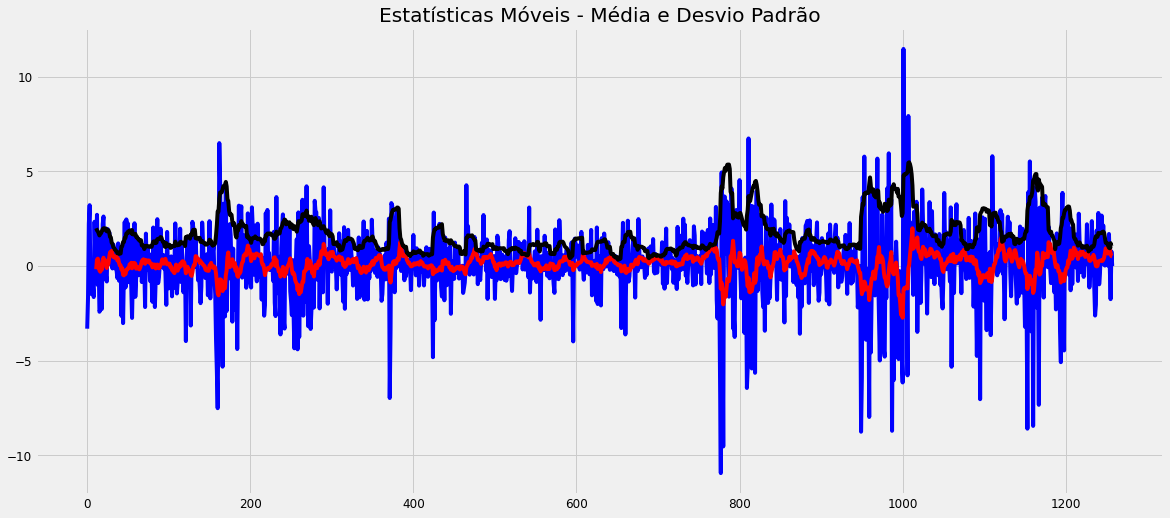


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.339059e+01
Valor-p                         4.776209e-25
Número de Lags Consideradas     7.000000e+00
Número de Observações Usadas    1.250000e+03
Valor Crítico (1%)             -3.435592e+00
Valor Crítico (5%)             -2.863855e+00
Valor Crítico (10%)            -2.568003e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [77]:
# We will test the stationarity of the series before any transformation

testa_estacionaridade(diff_primeira_ordem['Diff'])

### Decomposição

In [78]:
# Carrega os dados
df_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', header = None)

In [79]:
# Ajusta o nome das colunas
df_serie.columns = ['data','passageiros']

In [80]:
# Converte a data no formato apropriado
df_serie['data'] = pd.to_datetime(df_serie['data'], format = '%Y-%m')

In [81]:
# Define a data como índice da série
df_serie = df_serie.set_index('data')

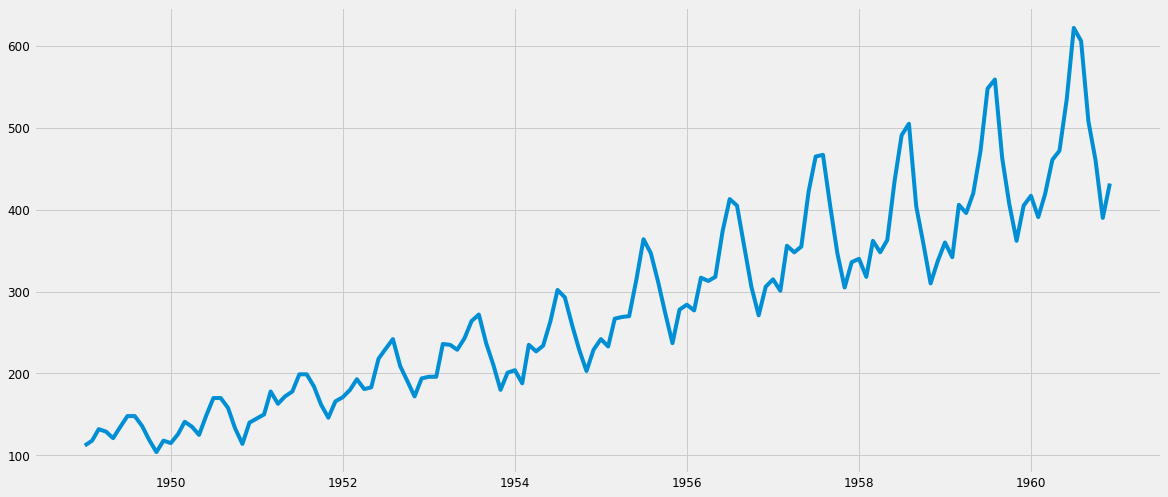

In [82]:
# Plot
plt.plot(df_serie)

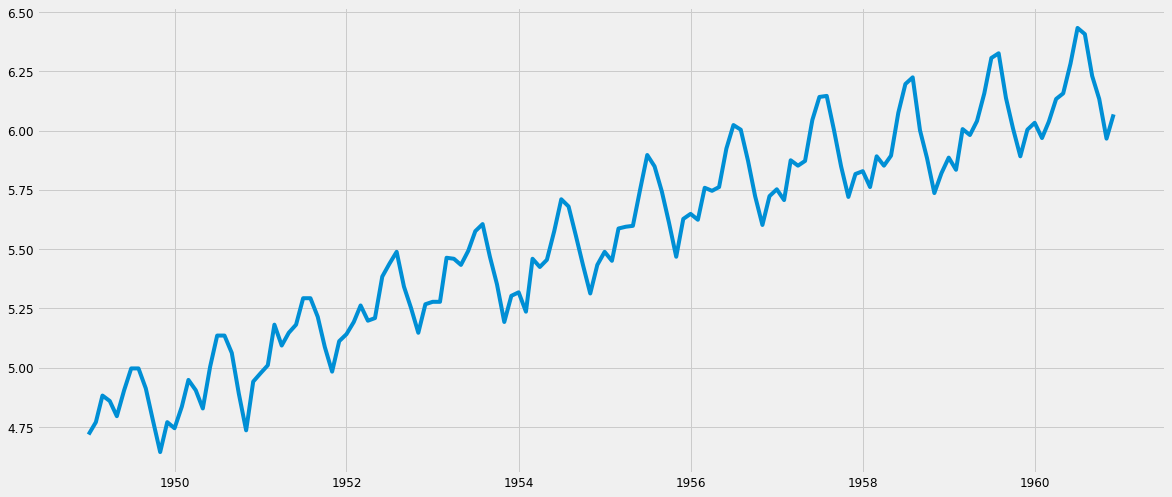

In [83]:
# Transformação Linear da Série
df_serie_log = np.log(df_serie)
plt.plot(df_serie_log)

### Decomposição

In [84]:
# Decompondo a série temporal
decomposition = seasonal_decompose(df_serie_log)

In [85]:
# Extraindo cada componente da série
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

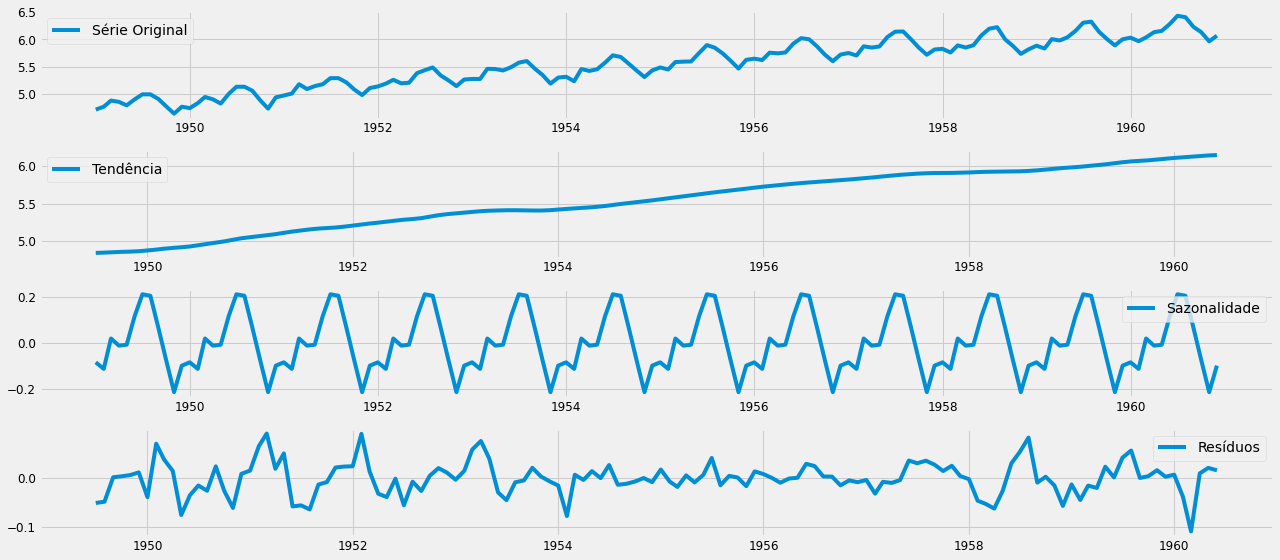

In [86]:
# Plot
plt.subplot(411)
plt.plot(df_serie_log, label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

A decomposição de séries temporais é geralmente apresentada como uma etapa de análise a ser executada antes da geração de previsões, mas também pode ser usada como um método de previsão por si só, se você souber como será a estrutura de suas séries temporais de antemão. Esses cenários ocorrem frequentemente em um contexto comercial, como previsão de demanda no varejo, onde é seguro assumir para alguns produtos que os dados de vendas terão um padrão sazonal anual e uma tendência ano a ano.

Para prever uma série temporal usando um modelo de decomposição, calculamos os valores futuros para cada componente separado e os adicionamos novamente para obter uma previsão. O desafio simplesmente se torna encontrar o melhor modelo para cada um dos componentes.